## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## L1

In [5]:
from keras.regularizers import l1

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0728 12:40:23.874408 4313929152 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0728 12:40:23.876211 4313929152 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 12:40:23.890781 4313929152 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 12:40:23.891547 4313929152 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:51

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0728 12:40:24.099709 4313929152 deprecation.py:323] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 106us/step - loss: 198.7554 - acc: 0.2404 - val_loss: 41.1973 - val_acc: 0.2242
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 19.1705 - acc: 0.1188 - val_loss: 7.3293 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 4.1313 - acc: 0.0995 - val_loss: 2.6557 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.4878 - acc: 0.1001 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4626 

50000/50000 [==============================] - 5s 97us/step - loss: 5.7259 - acc: 0.3658 - val_loss: 5.6445 - val_acc: 0.3868
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 5.5814 - acc: 0.3937 - val_loss: 5.5249 - val_acc: 0.3998
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 5.4597 - acc: 0.4160 - val_loss: 5.4088 - val_acc: 0.4207
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 5.3496 - acc: 0.4305 - val_loss: 5.3027 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 5.2461 - acc: 0.4443 - val_loss: 5.2111 - val_acc: 0.4458
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 5.1515 - acc: 0.4567 - val_loss: 5.1371 - val_acc: 0.4494
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 5.0606 - acc: 0.4644 - val_loss: 5.0339 - val_acc: 0.4614
Epoch 9/50
50000/50000 [======================

50000/50000 [==============================] - 5s 94us/step - loss: 1.7438 - acc: 0.3900 - val_loss: 1.7181 - val_acc: 0.3956
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6847 - acc: 0.4100 - val_loss: 1.6701 - val_acc: 0.4138
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6380 - acc: 0.4260 - val_loss: 1.6220 - val_acc: 0.4348
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5987 - acc: 0.4369 - val_loss: 1.5917 - val_acc: 0.4422
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5634 - acc: 0.4532 - val_loss: 1.5676 - val_acc: 0.4457
Epoch 8/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5337 - acc: 0.4618 - val_loss: 1.5399 - val_acc: 0.4570
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5060 - acc: 0.4719 - val_loss: 1.5196 - val_acc: 0.4653
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 95us/step - loss: 1.6526 - acc: 0.4183 - val_loss: 1.6332 - val_acc: 0.4289
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6045 - acc: 0.4367 - val_loss: 1.5984 - val_acc: 0.4378
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5636 - acc: 0.4503 - val_loss: 1.5586 - val_acc: 0.4528
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5299 - acc: 0.4621 - val_loss: 1.5374 - val_acc: 0.4494
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4980 - acc: 0.4724 - val_loss: 1.5064 - val_acc: 0.4664
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4708 - acc: 0.4833 - val_loss: 1.4987 - val_acc: 0.4661
Epoch 10/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4445 - acc: 0.4921 - val_loss: 1.4826 - val_acc: 0.4768
Epoch 11/50
50000/50000 [==========================

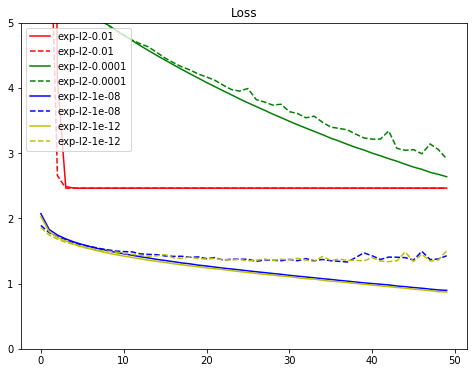

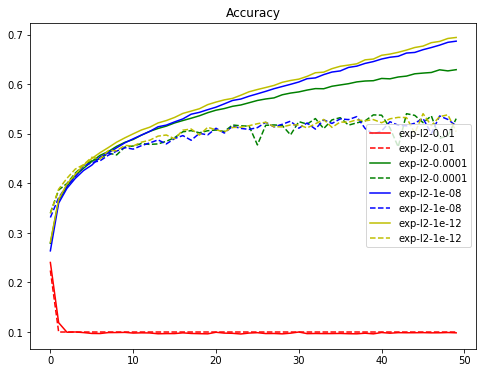

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## L1_L2

In [9]:
from keras.regularizers import l1_l2

def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 118us/step - loss: 18.7963 - acc: 0.2757 - val_loss: 17.3465 - val_acc: 0.3352
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 16.1296 - acc: 0.3592 - val_loss: 14.9727 - val_acc: 0.3655
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 13.9487 - acc: 0.3801 - val_loss: 12.9682 - val_acc: 0.3948
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 12.1019 - acc: 0.3957 - val_loss: 11.2781 - val_acc: 0.3965
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 10.5318 - acc: 0.4031 - val_loss: 9.8221 - val_acc: 0.4123
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 9.1959 - acc: 0.4098 - val_loss: 8.5927 - val_acc: 0.4123
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 8.0571 - acc: 0.4164 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 13.0359 - acc: 0.3538 - val_loss: 12.1450 - val_acc: 0.3709
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 11.3621 - acc: 0.3789 - val_loss: 10.6148 - val_acc: 0.3810
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 9.9505 - acc: 0.3914 - val_loss: 9.3162 - val_acc: 0.3968
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 8.7484 - acc: 0.4017 - val_loss: 8.2050 - val_acc: 0.4066
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 7.7239 - acc: 0.4108 - val_loss: 7.2691 - val_acc: 0.4135
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 6.8520 - acc: 0.4184 - val_loss: 6.4617 - val_acc: 0.4227
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 6.1070 - acc: 0.4235 - val_loss: 5.7736 - val_acc: 0.4253
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 6s 117us/step - loss: 11.3446 - acc: 0.3822 - val_loss: 10.5951 - val_acc: 0.3922
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 9.9343 - acc: 0.3944 - val_loss: 9.3053 - val_acc: 0.4027
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 8.7344 - acc: 0.4037 - val_loss: 8.1974 - val_acc: 0.4100
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 7.7114 - acc: 0.4116 - val_loss: 7.2629 - val_acc: 0.4121
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 6.8396 - acc: 0.4175 - val_loss: 6.4435 - val_acc: 0.4221
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 6.0943 - acc: 0.4257 - val_loss: 5.7681 - val_acc: 0.4282
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 5.4587 - acc: 0.4296 - val_loss: 5.1788 - val_acc: 0.4255
Epoch 10/50
50000/50000 [==================

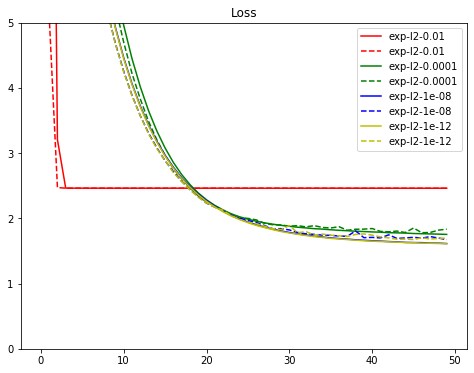

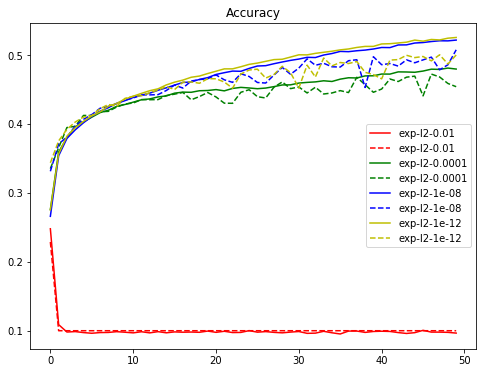

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()